In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Beginner

A class in python in constructed as follows:

In [15]:
class Particle():
    def __init__(self,x,y,z,vx,vy,vz,m):
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy= vy
        self.vz = vz
        self.m = m
    def move(self,t):
        self.x = self.x+ self.vx * t
        self.y += self.vy * t
        self.z += self.vz * t
    def get_distance_from_origin(self):
        return np.sqrt(self.x**2+self.y**2+self.z**2)

Now we create an **instance** of the **class** called `Particle`

In [11]:
p1 = Particle(3,0,1,1,0,0,3)

We can look at its attributes

In [12]:
p1.x

3

We can call on functions that **modify** the *particular instance* (called `p1`) of the class (called `Particle`).

In [13]:
p1.move(2)

In [14]:
p1.x

5

We can call on functions that **return information** about the *particular instance* (called `p1`) of the class (called `Particle`).

In [16]:
p1.get_distance_from_origin()

5.0990195135927845

We look directly at the **attributes** of the *particular instance* (called `p1`) of the class (called `Particle`).

In [17]:
p1.x

5

## Inheritance of Classes

We know from real life:  a **proton** is a type of particle. Therefore:

* a proton has all the characteristics of a particle
* a proton has unique traits that are seperate from a particle

This is precisely what class inheritance allows us to play with.

* A **child** (proton) class *inherits* all the traits of its **parent** (particle). Furthermore, the child may have seperate traits from its parent.

In [19]:
class Proton(Particle):
    def __init__(self,x,y,z,vx,vy,vz):
        self.q = 1.6e-19
        self.m = 9.11e-31
        super(Proton, self).__init__(x,y,z,vx,vy,vz,self.m)

Define proton class

In [20]:
p = Proton(0,0,1,1,0,0)

Has the functionality of its parent:

In [21]:
p.move(2)
p.x

2

We can also give the proton **child** class additional attributes. 

* A proton has an electric charge. Thus we *redefine* the `move` function to take into account the motion of the particle in the electric field.

In [22]:
class Proton(Particle):
    def __init__(self,x,y,z,vx,vy,vz):
        self.q = 1.6e-19
        self.m = 9.11e-31
        super(Proton, self).__init__(x,y,z,vx,vy,vz,self.m)
    def move(self, t, Ex, Ey, Ez):
        self.x += self.vx * t + (1/2)*(self.q/self.m)*Ex*t**2
        self.y += self.vy * t + (1/2)*(self.q/self.m)*Ey*t**2
        self.z += self.vz * t + (1/2)*(self.q/self.m)*Ez*t**2
        self.vx += (self.q/self.m)*Ex*t
        self.vy += (self.q/self.m)*Ey*t
        self.vz += (self.q/self.m)*Ez*t
    def get_position(self):
        return np.array([self.x, self.y, self.z])
    def get_velocity(self):
        return np.array([self.vx, self.vy, self.vz])

In [23]:
p = Proton(0,0,1,1,0,0)

Move the proton

In [24]:
p.move(t=2,Ex=4e-12,Ey=3e-12,Ez=6e-12)

Get position

In [25]:
p.get_position()

array([3.4050494 , 1.05378705, 3.10757409])

Move the proton some more

In [26]:
p.move(t=3,Ex=4e-12,Ey=5e-12,Ez=6e-12)

Get its position

In [27]:
p.get_position()

array([13.78155873,  8.16684962, 14.17233809])

# Intermediate

A class that contains all the information about a given projectile motion problem

* `ro`: Initial $(x,y)$ position of the particle
* `v0` Initial $(v_x, v_y)$ velocity of the particle
* `t_span`: Time span over which we consider the motion of the particle

Then we define some additional properties of the motion

* `get_peak_y` returns the maximum height obtained from the particle
* `get_peak_x` returns the horizontal distance corresponding to the peak y value
* `get_peak_t` returns the time when maximum height is reached
* `get_x_landing` returns the horizontal distance travelled by the projectile (before it hits the ground)

In [28]:
class Projectile():
    def __init__(self,r0,v0, g, t_span):
        self.t = t_span
        x0, y0 = r0
        vx0, vy0 = v0
        self.x = x0 + vx0*self.t
        self.y = y0 + vy0*self.t + -(1/2)*g*self.t**2
    def get_peak_y(self):
        return max(self.y)
    def get_peak_x(self):
        return self.x[np.argmax(self.y)]
    def get_peak_t(self):
        return self.t[np.argmax(self.y)]
    def get_x_landing(self):
        x_after_peak = self.x[self.t>self.get_peak_t()]
        y_after_peak = self.y[self.t>self.get_peak_t()]
        return x_after_peak[np.argmin(np.abs(y_after_peak))]

Create a projectile and plot

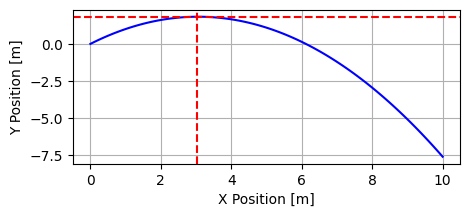

In [29]:
p = Projectile(r0=[0,0],
               v0=[5,6],
               g=9.81,
               t_span = np.linspace(0,2,100))

plt.figure(figsize=(5,2))
plt.plot(p.x, p.y,'blue')
plt.axhline(p.get_peak_y(), color='r', ls='--')
plt.axvline(p.get_peak_x(), color='r', ls='--')
plt.xlabel('X Position [m]')
plt.ylabel('Y Position [m]')
plt.grid()
plt.show()

Of course, the real advantage is when you're dealing with many class instances

In [30]:
thetas = np.linspace(0,np.pi/2,100)
v0 = 5
vys = v0*np.sin(thetas)
vxs = v0*np.cos(thetas)

In [33]:
[i**2 for i in range(5)]

[0, 1, 4, 9, 16]

In [34]:
thetas = np.linspace(0,np.pi/2,100)
v0 = 5
vys = v0*np.sin(thetas)
vxs = v0*np.cos(thetas)

ps = [Projectile(r0=[0,0],
               v0=[vx,vy],
               g=9.81,
               t_span = np.linspace(0,3,300)) for vx,vy in zip(vxs,vys)]

Compute maximum heights and maximum distances travelled

In [35]:
max_heights = [p.get_peak_y() for p in ps]
x_landings = [p.get_x_landing() for p in ps]

Plot

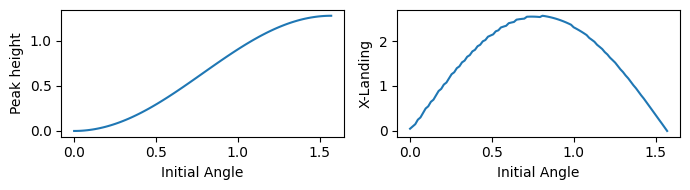

In [36]:
fig = plt.figure(figsize=(7,2))
plt.subplot(121)
plt.plot(thetas, max_heights)
plt.xlabel('Initial Angle')
plt.ylabel('Peak height')
plt.subplot(122)
plt.plot(thetas, x_landings)
plt.xlabel('Initial Angle')
plt.ylabel('X-Landing')
fig.tight_layout()
plt.show()

This can be made simpler with an even better class:
* `Projectiles` is a class of that, as its attributes, contains many instances of the `Projectile` class

In [37]:
class Projectiles():
    def __init__(self,r0,v0s, g, t_span):
        self.ps = [Projectile(r0=r0,
               v0=v0,
               g=g,
               t_span = t_span) for v0 in v0s]
    def get_max_heights(self):
        return [p.get_peak_y() for p in self.ps]
    def get_xlandings(self):
        return [p.get_x_landing() for p in self.ps]
    def get_projectiles(self):
        return self.ps

Create a bunch of projectiles

In [44]:
thetas = np.linspace(0,np.pi/2,100)
v0 = 5
vys = v0*np.sin(thetas)
vxs = v0*np.cos(thetas)

ps = Projectiles(r0=[0,0],
                         v0s=np.array([vxs, vys]).T,
                         g = 9.81,
                         t_span= np.linspace(0,3,300))

Get the horizontal landing positions of all the particles

In [45]:
x_landings = ps.get_xlandings()

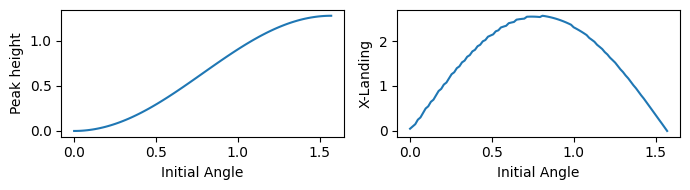

In [46]:
fig = plt.figure(figsize=(7,2))
plt.subplot(121)
plt.plot(thetas, max_heights)
plt.xlabel('Initial Angle')
plt.ylabel('Peak height')
plt.subplot(122)
plt.plot(thetas, x_landings)
plt.xlabel('Initial Angle')
plt.ylabel('X-Landing')
fig.tight_layout()
plt.show()

# Advanced

In practice, a real projectile may experience arbitrary forces acting on it (gravity, air friction, electric/magnetic field, etc). By deifning a more advanced class, we can take into account all these possibilities:
* Now we'll include a function `F(t,x,y,vx,vy,m)` which is a general force function acting on the particle. This can encompass all sorts of conditions

**Projectile motion** in more depth: See https://www.youtube.com/watch?v=b9S_L1AaJNw

In [47]:
class Projectile():
    def __init__(self,r0,v0,t,F,m,*args):
        self.t = t
        self.x0, self.y0 = r0
        self.vx0, self.vy0 = v0
        self.F = F
        self.m = m
        self.args = args
    def solve_motion(self):
        def dSdt(t, S, *args):
            x, vx, y, vy = S
            return [vx, self.F(t,x,y,vx,vy,m,*args)[0]/self.m,
                    vy, self.F(t,x,y,vx,vy,m,*args)[1]/self.m]
        self.solution = solve_ivp(dSdt, [min(self.t), max(self.t)],
                                  [self.x0,self.vx0,self.y0,self.vy0],
                                  t_eval=self.t, args=self.args)
        self.x, self.vx, self.y, self.vy = self.solution.y
    def get_peak_y(self):
        return max(self.y)
    def get_peak_x(self):
        return self.x[np.argmax(self.y)]
    def get_peak_t(self):
        return self.t[np.argmax(self.y)]
    def get_x_landing(self):
        x_after_peak = self.x[self.t>self.get_peak_t()]
        y_after_peak = self.y[self.t>self.get_peak_t()]
        return x_after_peak[np.argmin(np.abs(y_after_peak))]

Define a couple force functions

* `force_1` for quadratic air friction
* `force_2` for linear air friction

In [49]:
def force_1(t,x,vx,y,vy,m,g,b):
    return [-b*np.sqrt(vx**2+vy**2)*vx, -b*np.sqrt(vx**2+vy**2)*vy - m*g]
def force_2(t,x,vx,y,vy,m,g,b):
    return [-b*vx, -b*vy - m*g]

Set up particles

* `p1` experiences **gravity** and **quadratic** air friction
* `p2` experiences **gravity** and **linear** air friction

In [50]:
# Conditions
r0=[0,0]
v0=[10*np.cos(np.pi/4),10*np.sin(np.pi/4)]
t = np.linspace(0,1,1000)
m=1
g = 9.8
b1 = 1
b2 = 5

# Paricle Motion
p1 = Projectile(r0, v0, t, force_1, m, g, b1)  
p2 = Projectile(r0, v0, t, force_2, m, g, b2)  
p1.solve_motion()
p2.solve_motion()

Plot

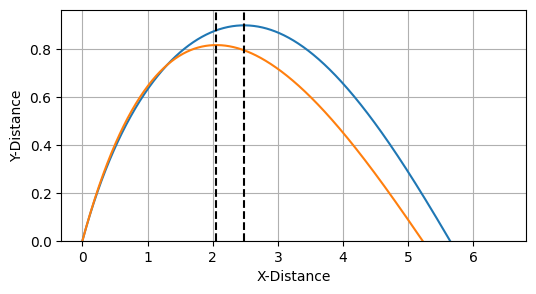

In [51]:
plt.figure(figsize=(6,3))
plt.plot(p1.x,p1.y)
plt.plot(p2.x,p2.y)
plt.axvline(p1.get_peak_x(), color='k', ls='--', label='Quadratic Friction')
plt.axvline(p2.get_peak_x(), color='k', ls='--', label='Linear Friction')
plt.ylim(bottom=0)
plt.grid()
plt.xlabel('X-Distance')
plt.ylabel('Y-Distance')
plt.show()

# Exercise

For the case of air friction

1. Modify the `Projectiles` class (from intermediate portion of this video) to take in a bunch of `Projectile` classes (from the advanced portion of the video), and solve for the motion of all the projectiles.
2. Create an instance of the `Projectiles` class that contains a bunch of particles with the same initial position, launch speed, quadratic air friction, and gravity as above, but modify the angles such that there is 100 launch angles between $\theta=0.01$ and $\theta=\pi/2-0.01$.
3. Use the `get_max_heights` and `get_xlandings` to plot the maximum height and maximum horizontal distance as a function of initial launch angle $\theta$